In [2]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt

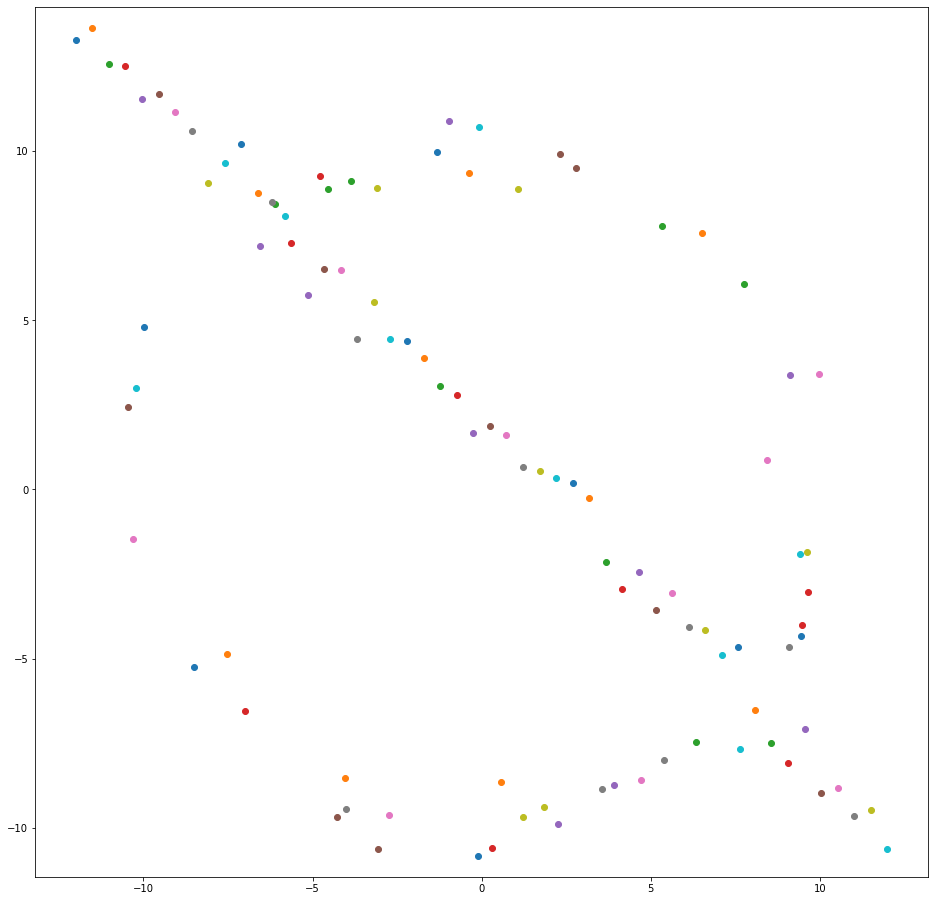

In [5]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt

#np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r /16
t = np.random.uniform (0 , 2*np.pi , half_n )
n = s * np.random.randn( half_n )
x , y = (r + n)*np.cos(t) , (r + n)*np.sin(t)
X_circ = np.hstack(( x.reshape(half_n , 1 ) , y.reshape (half_n , 1 )))
m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn( half_n )
X_line = np.hstack(( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
X = np.vstack ( ( X_line ,X_circ  ) )

plt.figure(figsize=(16,16))
for point in X:
    plt.scatter(point[0],point[1])
    plt.axis("equal")
plt.show()

RANSAC for a Straight Line

C:\Users\Shyamal\AppData\Local\Temp\ipykernel_5336\3776084300.py:22: RuntimeWarning: invalid value encountered in double_scalars
  distance = abs((a*X[i][0] + b*X[i][1] + c)/ (np.sqrt(a**2 + b**2)) )


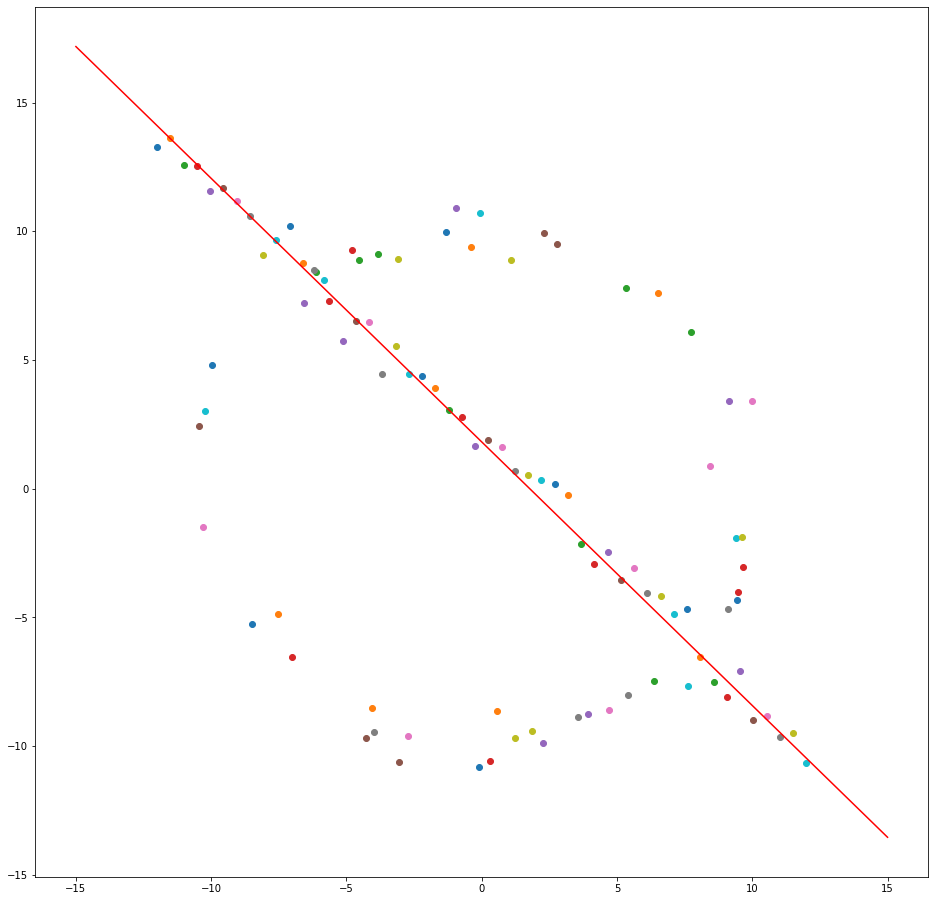

Number of Samples = 600
Inlinear Count = 53


In [6]:
import random

s = 2
t = 1
e = 0.3
p = 0.99
N = int (np.log(1-p) / np.log(1 - (1-e)**s)) * 100

max_inlinear_count = 0
coefficients = []

for sample in range(0 , N+1):
    dot1 , dot2 = random.randint(0,len(X)-1), random.randint(0,len(X)-1)
    # equation of a line passing the 2 points ; (y1-y2).X + (x2-x1).Y + (x1.y2 - y1.x2) = 0 
    a = X[dot1][1] - X[dot2][1]
    b = X[dot2][0] - X[dot1][0]
    c = X[dot1][0]*X[dot2][1]  - X[dot1][1]*X[dot2][0]

    # find the count of the points lying withing the threshold (t)
    inlinears_count = 0
    for  i in range(0 , len(X)):
        distance = abs((a*X[i][0] + b*X[i][1] + c)/ (np.sqrt(a**2 + b**2)) )
        if distance < t:
            inlinears_count += 1

    if inlinears_count > max_inlinear_count:
        max_inlinear_count = inlinears_count
        coefficients = [ a, b, c]

plt.figure(figsize=(16,16))
for point in X:
    plt.scatter(point[0],point[1])

A , B , C = coefficients[0] , coefficients[1] , coefficients[2]
x_values = np.arange(-15,15+1)
y_values = -1*(x_values*A +C)/B

plt.plot(x_values, y_values , color="red")
plt.show()
print("Number of Samples =",N)
print("Inlinear Count =",max_inlinear_count)

RANSAC for a Circle

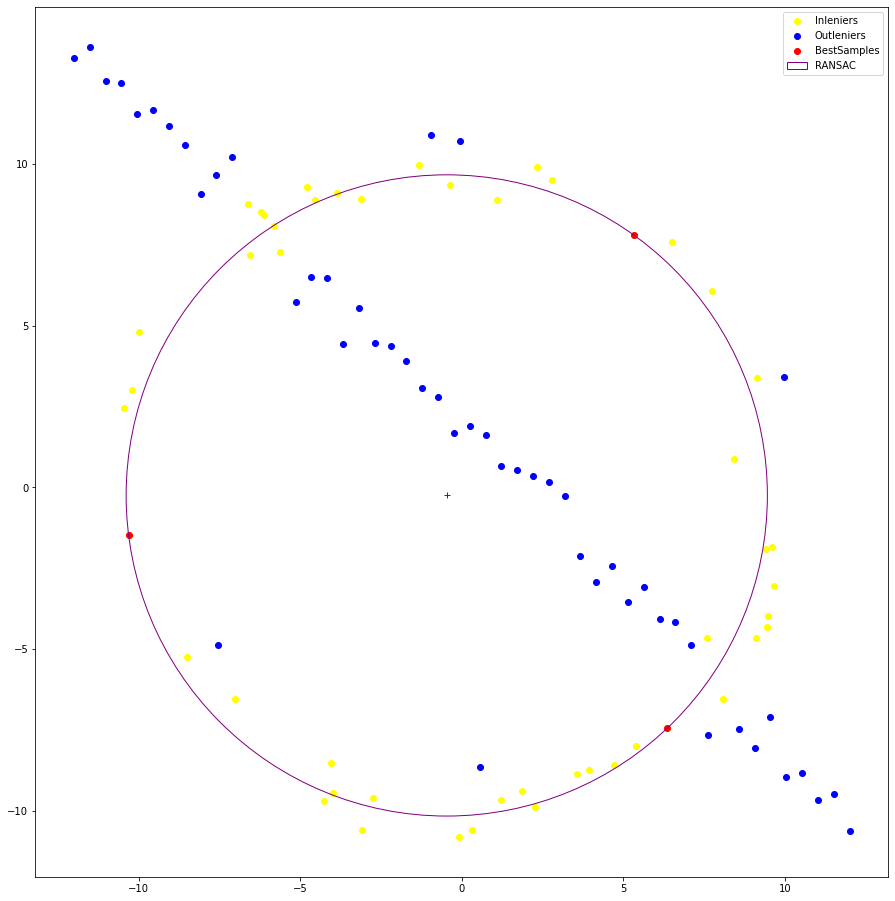

Number of Samples = 1000
Inlinear Count = 49


In [60]:
import random
N = 1000
t = 1
max_inlinear_count = 0


for sample in range(0 , N+1):
    dot1 , dot2 , dot3 = random.randint(0,len(X)-1), random.randint(0,len(X)-1) , random.randint(0,len(X)-1)
    x1,x2,x3 = X[dot1][0] , X[dot2][0] , X[dot3][0]
    y1,y2,y3 = X[dot1][1] , X[dot2][1] , X[dot3][1]

    P = np.array([[2*x1 , 2*y1 , 1] , [2*x2 , 2*y2 , 1] , [2*x3 , 2*y3 , 1]])
    if (np.linalg.det(P)==0): continue
    K = np.array([[x1**2 +y1**2] , [x2**2 +y2**2] , [x3**2 +y3**2]])*(-1)
    answ = np.linalg.inv(P) @ K
    g , f , c = answ[0][0] , answ[1][0] , answ[2][0]
    radius = np.sqrt(g**2 + f**2 -c)
    if (radius>10): continue
    center = [-g , -f]

    inlinears_count = 0
    for  i in range(0 , len(X)):
        distance = abs(np.sqrt((X[i][0]-center[0])**2 + (X[i][1]-center[1])**2) - radius)
        if distance < t:
            inlinears_count += 1
    if inlinears_count > max_inlinear_count:
        max_inlinear_count = inlinears_count
        F , G , C =  f, g, c
        R = np.sqrt(G**2 + F**2 -C)
        best_Sample = np.array([X[dot1],X[dot2],X[dot3]])
        

In,Out = [] ,[]
for point in X:
    d = abs(np.sqrt((point[0]+G)**2 + (point[1]+F)**2) - R)
    if d < t:
        In.append(point)
    else:
        Out.append(point)

Inlin = np.array(In).T
Outlin = np.array(Out).T
Samp = best_Sample.T

figure, axes = plt.subplots( 1, figsize=(16,16) )

parth = plt.Circle((-G,-F), R, fill=False, color="purple" ,label="RANSAC")
axes.scatter(Inlin[0],Inlin[1], color="yellow" , label="Inleniers")
axes.scatter(Outlin[0],Outlin[1], color="blue" , label="Outleniers")
axes.scatter(Samp[0] ,Samp[1], color="red" , label="BestSamples")
axes.plot(-G,-F,"+",color="purple")
axes.set_aspect( 1 )
axes.add_artist( parth )
plt.legend(loc ="upper right")
plt.show()

print("Number of Samples =",N)
print("Inlinear Count =",max_inlinear_count)


In [9]:
p1= [-7.77485156,  6.0536828 ]
p2 = [-11.02040816 , 12.86370334]
p3 = [-7.779985156 , 6.5536828 ]
m1 = (p1[1] - p3[1])/(p1[0] - p3[0])
m2 = (p2[1] - p3[1])/(p2[0] - p3[0])
print(m1,m2)

-97.39761368054113 -1.9472829726893275


In [49]:
l=np.array([])

In [54]:
p=[[2,5,7]]
np.array(p)

array([[2, 5, 7]])